In [323]:
import torch
import random
import numpy as np
from likelihood import *
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from data_generator import *
from formate_matrix_toMLData import * 
import os
from sklearn.model_selection import train_test_split

from model_scripts.diagonal_var_initial_ratio_02.DeepSets_varSet_diagnal import *
# from model_scripts.proto_type.prototype_02.DeepSets_varSet_diagnal import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
plt.rcParams["font.size"] = 22  # 全体のフォントサイズ
np.set_printoptions(suppress=True)
import seaborn as sns

In [324]:
def choose_random_file(directory_path):
    # ディレクトリ内のファイルを取得
    files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path,f))]
    # ファイルがある場合のみ，ランダム選択
    if files:
        return random.choice(files)
    else:
        return None

scaler = StandardScaler()
class mean_lifespan_loss(nn.Module):
    def forward(self, outputs, targets):
         # 安全のため、小さい値を追加してゼロ割りを防止
        epsilon = 1e-12
        y_pred_inverse = 1.0 / (outputs + epsilon)
        y_true_inverse = 1.0 / (targets + epsilon)
        
        # 逆数の差の絶対値
        loss = torch.abs(y_pred_inverse - y_true_inverse).mean()
        
        # 平均損失を計算
        return loss

class max_lifespan_loss(nn.Module):
    def forward(self, outputs, targets):
         # 安全のため、小さい値を追加してゼロ割りを防止
        epsilon = 1e-12
        y_pred_inverse = 1.0 / (outputs + epsilon)
        y_true_inverse = 1.0 / (targets + epsilon)
        
        # 逆数の差の絶対値
        loss_tensor = torch.abs(y_pred_inverse - y_true_inverse)[0]
        # print(loss_tensor)
        # 最大損失の値とインデックスを取得
        max_loss, max_index = torch.max(loss_tensor, dim=0)
        
        # 平均損失を計算
        return max_loss, max_index
class all_lifespan_loss(nn.Module):
    def forward(self, outputs, targets):
        epsilon = 1e-12
        y_pred_inverse = 1.0 / (outputs + epsilon)
        y_true_inverse = 1.0 / (targets + epsilon)
        
        # 逆数の差の絶対値
        loss_tensor = torch.abs(y_pred_inverse - y_true_inverse)[0]
        return loss_tensor, y_true_inverse[0], y_pred_inverse
criterion = all_lifespan_loss()

In [ ]:
# ランダムに３つ抽出してデータを作成
# directory_path = "/Users/yamashitanatsuki/Desktop/data/likelihooded_text_uniform_life"
# directory_path = "/Users/yamashitanatsuki/Desktop/data/test_uniform_life"
directory_path = "datas/test_data_0"


test_states = []
test_del_t = []
test_outputs = []
dataset = []
formater = formate_dataMatrix()

def count_files(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
print(count_files(directory_path))


500


In [326]:
#期待寿命分布の確認
# lifespans = []
# def get_lifespan(file_path):
#     with open(file_path,encoding="utf-8") as f:
#         all_matrix = np.loadtxt(f,delimiter=",")
#     tm = matrix_trimer(all_matrix)
#     trm  = tm.trim_transitionRateMatrix()
#     for i in range(3):
#         lifespans.append(1/trm[i][i+1])
# formater.process_all_files_in_directory(directory_path,get_lifespan)
# sns.violinplot(lifespans)

In [ ]:
def process_file(file_path):
    #ファイルの読み込み
    with open(file_path,encoding="utf-8-sig") as f:
        all_matrix = np.loadtxt(f, delimiter= ",")
    tm = matrix_trimer(all_matrix)
    trm = tm.trim_transitionRateMatrix()
    data = tm.trim_data()
    dataset.append(data)
    output_vec = np.array(formater.GetOutputVector_byDiagonal(trm))
    
    # states に追加（各要素は (2, num_samples_i) の形状）
    state = np.stack([data[:,0], data[:,1]], axis=0)# shape: (2, num_samples_i)
    test_states.append(state)
    
    # del_t に追加（各要素は (num_samples_i,) の形状）
    test_del_t.append(data[:, 2])
    
    # outputs に追加（各要素は (6,) の形状）
    test_outputs.append(output_vec)
    print(file_path)

formater.process_all_files_in_directory(directory_path,process_file)

datas/test_data_0\0_30000_4.csv
datas/test_data_0\100_30000_4.csv
datas/test_data_0\101_30000_4.csv
datas/test_data_0\102_30000_4.csv
datas/test_data_0\103_30000_4.csv
datas/test_data_0\104_30000_4.csv
datas/test_data_0\105_30000_4.csv
datas/test_data_0\106_30000_4.csv
datas/test_data_0\107_30000_4.csv
datas/test_data_0\108_30000_4.csv
datas/test_data_0\109_30000_4.csv
datas/test_data_0\10_30000_4.csv
datas/test_data_0\110_30000_4.csv
datas/test_data_0\111_30000_4.csv
datas/test_data_0\112_30000_4.csv
datas/test_data_0\113_30000_4.csv
datas/test_data_0\114_30000_4.csv
datas/test_data_0\115_30000_4.csv
datas/test_data_0\116_30000_4.csv
datas/test_data_0\117_30000_4.csv
datas/test_data_0\118_30000_4.csv
datas/test_data_0\119_30000_4.csv
datas/test_data_0\11_30000_4.csv
datas/test_data_0\120_30000_4.csv
datas/test_data_0\121_30000_4.csv
datas/test_data_0\122_30000_4.csv
datas/test_data_0\123_30000_4.csv
datas/test_data_0\124_30000_4.csv
datas/test_data_0\125_30000_4.csv
datas/test_data_0\

In [328]:

# データセットとデータローダーの作成
test_dataset = varSets_Datasets(test_states, test_del_t, test_outputs)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

In [330]:
data_iter = iter(test_dataloader)
#モデルによる推定
# model = torch.load("model_scripts/diagonal_perTime/diagonal_perTime_customLoss.pth",weights_only=False)
device = torch.device("cpu")
model = torch.load("model_scripts\diagonal_var_initial_ratio_02\diagonal_var_ratio_inverse.pth",weights_only=False).to(device)
# model = torch.load("model_scripts\proto_type\prototype_02\diagonal_prototype_02_BigDataSet02.pth",weights_only=False).to(device)
model.eval()
loss_list = []
normal_targets = []
abnormal_targets = []
abnormal_loss = []
count = 0
abnormal_count = 0
threshold = 1
outs_lifespan = []
true_lifespan = []
q_l = []
loss_sum = 0
count = 0
for a, b, c,d in data_iter:
    with torch.no_grad():
        out = model(a, b, d)[0]
        loss, true_expect ,pred_expect= criterion(out,c)
        # print(loss, idx)
        # loss = loss.item()
        print(loss)
        loss_sum+=loss
        count += 1
        for i in range(3):
            true_lifespan.append(true_expect[i].item())
            outs_lifespan.append(pred_expect[i].item())
            
    q_l.append(out)
            
    # if loss > threshold:
    #     abnormal_count += 1
    #     abnormal_targets.append(c.detach().numpy()[0])
    #     abnormal_loss.append(loss)
    # else:
    #     loss_list.append(loss)
    #     normal_targets.append(c.detach().numpy()[0])
    #     count +=1
    
    # print(f"output is {out}")
    # print(f"target is {c}")
    # print(loss)

df = pd.DataFrame()
df["true"] = true_lifespan
df["pred"] = outs_lifespan
df["loss"] = (df["true"] - df["pred"]).abs()
print(loss_sum/count)

tensor([0.6533, 0.1809, 0.0551])
tensor([0.0899, 0.2655, 0.1383])
tensor([0.0032, 0.3548, 0.2612])
tensor([0.1702, 0.2049, 0.0736])
tensor([0.9767, 0.0575, 0.1462])
tensor([0.8816, 0.1837, 0.0054])
tensor([0.1019, 0.0495, 0.1383])
tensor([0.1334, 0.1022, 0.0570])
tensor([0.0208, 0.0726, 0.0896])
tensor([0.1597, 0.3989, 0.0729])
tensor([0.1526, 0.2429, 0.0577])
tensor([0.1128, 0.3149, 0.0205])
tensor([0.1043, 0.3219, 0.1931])
tensor([0.0357, 0.0855, 0.0533])
tensor([0.0572, 0.2837, 0.1129])
tensor([0.1560, 0.0233, 0.0546])
tensor([0.0775, 0.3812, 0.0103])
tensor([0.0865, 0.0155, 0.0596])
tensor([0.2775, 0.1944, 0.1547])
tensor([3.5777, 0.3333, 0.4896])
tensor([0.1473, 0.0592, 0.0428])
tensor([0.0675, 0.3778, 0.1179])
tensor([2.7875e-03, 1.6086e+01, 2.4679e-03])
tensor([0.3183, 1.5187, 0.0652])
tensor([0.0361, 0.2523, 0.0170])
tensor([0.2788, 0.3539, 0.2059])
tensor([2.4872, 0.3633, 0.0877])
tensor([0.0504, 0.4218, 0.0223])
tensor([0.1406, 0.1734, 0.2225])
tensor([4.1863, 0.2139, 0.1382]

[0.6533346176147461, 0.18088698387145996, 0.055110812187194824, 0.08987390995025635, 0.26549386978149414, 0.13829946517944336, 0.003220200538635254, 0.3548407554626465, 0.26117491722106934, 0.17016220092773438, 0.2049427032470703, 0.07359564304351807, 0.9766783714294434, 0.057540178298950195, 0.14616215229034424, 0.8816394805908203, 0.1837315559387207, 0.005357623100280762, 0.10188865661621094, 0.04945492744445801, 0.13831663131713867, 0.1333637237548828, 0.10216391086578369, 0.056951045989990234, 0.02076709270477295, 0.0726233720779419, 0.08962154388427734, 0.15967988967895508, 0.3989410400390625, 0.07291889190673828, 0.15260636806488037, 0.24293804168701172, 0.05772888660430908, 0.11282932758331299, 0.3148941993713379, 0.020504236221313477, 0.10428810119628906, 0.32192516326904297, 0.1930985450744629, 0.035723209381103516, 0.0854654312133789, 0.05328476428985596, 0.05722332000732422, 0.2837477922439575, 0.11286425590515137, 0.155975341796875, 0.023341655731201172, 0.05461502075195312

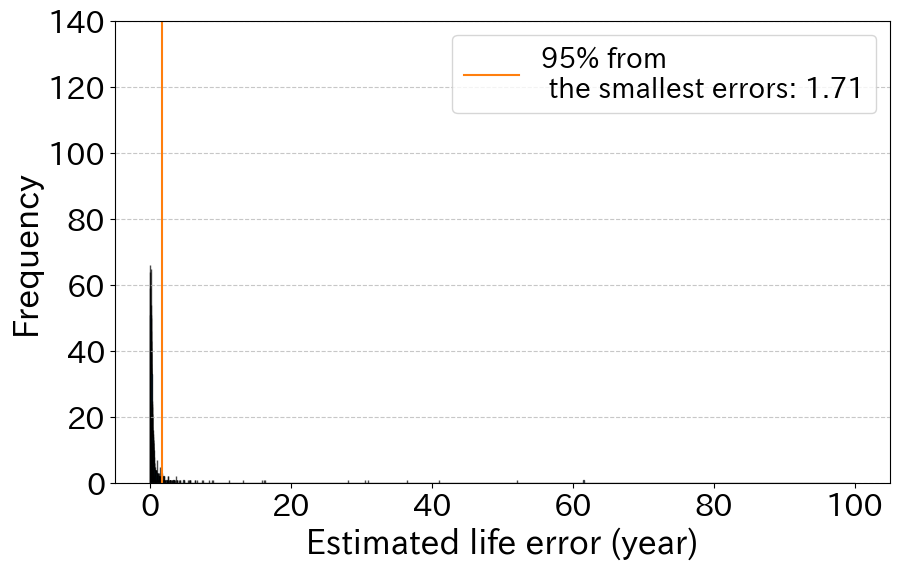

In [331]:
#損失の描画
# ヒストグラムを使った損失値分布の可視化
bin_width = 0.01
bin_max =100
df.loc[df["loss"] > 100.0, "loss"] = 100
loss_list = list(df["loss"])
idx = int((len(loss_list)-1)*0.95)
print(loss_list)
loss_list.sort()
l = loss_list[idx]
print(l)
y = np.linspace(0,150)
bins = np.arange(min(df["loss"]), bin_max + bin_width, bin_width)
plt.figure(figsize=(10, 6))
plt.hist(df["loss"], bins=bins,range = (0, bin_max),edgecolor='black', alpha=0.7)
plt.plot([l]*len(y),y,label = f"95% from \n the smallest errors: {round(l,2)}")
# plt.scatter([],[],label = f"95%誤差：{round(l,2)}",color = "#FFFFFF")
plt.legend(fontsize = 20)

# タイトル、軸ラベルの追加
# plt.title('期待寿命20以下の推定寿命誤差', fontsize=16)
# plt.title("推定期待寿命誤差の分布")
plt.ylim((0,140))
plt.xlabel('Estimated life error (year)', fontsize=24)
plt.ylabel('Frequency', fontsize=24)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [332]:
# #最大期待寿命の表示
# #異常値の処理
# ab_max_lifespans = []
# ab_sum_lifespans = []
# for vec in abnormal_targets:
#     max_lifespan = 0
#     sum_lifespan = 0
#     for i in vec:
#         lifespan = 1 / i
#         if lifespan > max_lifespan:
#             max_lifespan = lifespan
#         sum_lifespan += lifespan
#     ab_sum_lifespans.append(float(sum_lifespan))
#     ab_max_lifespans.append(float(max_lifespan))
#     print(float(max_lifespan))

# #正常値処理
# max_lifespans = []
# sum_lifespans = []
# for vec in normal_targets:
#     max_lifespan = 0
#     sum_lifespan = 0
#     for i in vec:
#         lifespan = 1 / i
#         if lifespan > max_lifespan:
#             max_lifespan = lifespan
#         sum_lifespan += lifespan
#     sum_lifespans.append(float(sum_lifespan))
#     max_lifespans.append(float(max_lifespan))
#     print(float(max_lifespan))

In [333]:
# #異常値データをdfにまとめる
# import pandas as pd
# abnormal_df = pd.DataFrame({
#     "loss" : abnormal_loss,
#     "max_lifespan" : ab_max_lifespans,
#     "sum_lifespan" : ab_sum_lifespans,
#     "parameters" : abnormal_targets
# })
# display(abnormal_df.head(5))
# normal_df = pd.DataFrame({
#     "loss" : loss_list,
#     "max_lifespan" : max_lifespans,
#     "sum_lifespan" : sum_lifespans,
#     "parameters" : normal_targets
# })

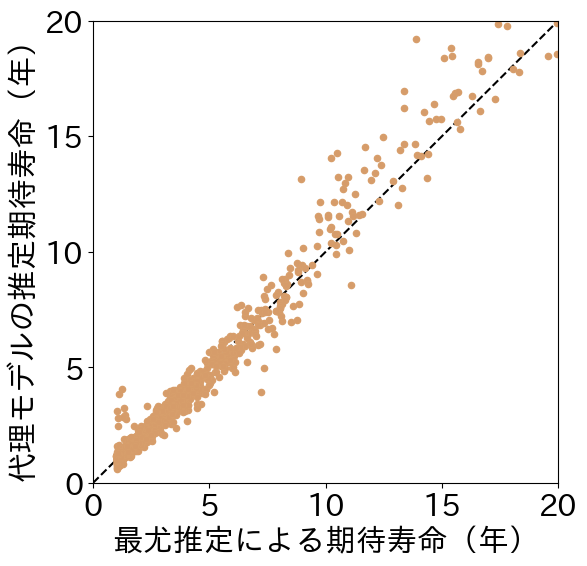

In [335]:
plt.figure(figsize=(6,6))
x = np.linspace(0, 100, 1000)

plt.xlim(0,20)
plt.ylim(0,20)
# plt.yticks(np.linspace(0,100,5))
plt.xlabel("最尤推定による期待寿命（年）")
plt.ylabel("代理モデルの推定期待寿命（年）")
plt.plot(x,x,color="#000000", linestyle = '--',zorder= 0)
plt.scatter(df["true"],df["pred"],color = "#d69c6a",edgecolors="#d79e6b",s = 20,  zorder= 1)
